# Parameter Variation and Optimization

Create a machine with 4 poles:

In [1]:
machine = dict(
    name="PM-4-130",
    lfe=0.1,
    poles=4,
    outer_diam=0.13,
    bore_diam=0.07,
    inner_diam=0.015,
    airgap=0.0015,
     
    stator=dict(
        num_slots=12,
        rlength=1.0,
        statorRotor3=dict(
            slot_height=0.02,
            slot_h1=0.002,
            slot_h2=0.004,
            slot_r1=0.0,
            slot_r2=0.0,
            wedge_width1=0.0,
            wedge_width2=0.0,
            middle_line=0,
            tooth_width=0.009,
            slot_top_sh=0,
            slot_width=0.003)
    ),

    magnet=dict(
        magnetSector=dict(
            magn_num=1,
            magn_width_pct=0.6,
            magn_height=0.005,
            magn_shape=0.02,
            bridge_height=0,
            magn_type=2,
            condshaft_r=0.02,
            magn_ori=1,
            magn_rfe=0.0,
            bridge_width=0,
            magn_len=1)
    ),

    windings=dict(
        num_phases=3,
        num_wires=20,
        coil_span=3.0,
        num_layers=1)
)

Use a pm_sym_fast calculation at a rotor speed of 5000 1/min:

In [2]:
operatingConditions = dict(
    speed=5000.0 / 60,
    calculationMode="pm_sym_fast",
    num_move_steps=49,
    magn_temp=20.0,
    wind_temp=60,
    current=28.284,
    angl_i_up=0.0)

Define the variation parameters with their ranges and number of steps:

In [3]:
decision_vars = [
        {"steps": 5, "bounds": [3e-3, 8e-3],
         "name": "stator.statorRotor3.slot_width",
         "label": "Slot Width/m"},
        {"steps": 5, "bounds": [0.72, 0.85],
         "name": "magnet.magnetSector.magn_width_pct",
         "label": "Rel. Magnet Width"},
        {"steps": 5, "bounds": [0.024, 0.0335],
         "name": "magnet.magnetSector.magn_shape",
         "label": "Magnet Shape/m"}
    ]

Define the objective parameters:

In [4]:
objective_vars = [
        {"name": "dqPar.torque[-1]",
         "label": "Load Torque/Nm"},
        {"name": "torque[0].ripple",
         "label": "Cogging Torque/Nm"},
        {"name": "torque[-1].ripple",
         "label": "Torque Ripple/Nm"}
    ]

Combine the objective and variation parameters and set the population size which is in this case the upper limit of the bucket size (ie. the number of parallel calculations):

In [5]:
parvardef = {
    "objective_vars": objective_vars,
    "population_size": 20,
    "decision_vars": decision_vars
}

Use logging to get a feedback during the calculation:

In [6]:
import logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(message)s')

Setup up an engine the drives the calculation. Here we chose a multi-core calculation: 

In [7]:
from femagtools.multiproc import Engine
engine = Engine()

Define the working directory:

In [8]:
import os
userdir = os.path.expanduser('~')
workdir = os.path.join(userdir, 'parvar2')
try:
    os.makedirs(workdir)
except OSError:
    pass

Start the parameter variation with the total 125 FE calculations (duration on a Linux i7 laptop with 4 cores: 30min):

In [9]:
import femagtools.grid
parvar = femagtools.grid.Grid(workdir)
results = parvar(parvardef, machine, operatingConditions, engine)

2018-11-10 14:38:18,837 STEPS [5, 5, 5]
2018-11-10 14:38:18,839 Decision Vars: ['stator.statorRotor3.slot_width', 'magnet.magnetSector.magn_width_pct', 'magnet.magnetSector.magn_shape']
2018-11-10 14:38:18,841 bounds lower: (0.003, 0.72, 0.024)  upper: (0.008, 0.85, 0.0335)
2018-11-10 14:38:18,843 ........ 1 / 7
2018-11-10 14:38:18,844 Prepare: stator.statorRotor3.slot_width = 0.003
2018-11-10 14:38:18,845 Prepare: magnet.magnetSector.magn_width_pct = 0.72
2018-11-10 14:38:18,847 Prepare: magnet.magnetSector.magn_shape = 0.024
2018-11-10 14:38:18,848 prepare [0.003 0.72  0.024]
2018-11-10 14:38:18,865 use template new_model.mako
2018-11-10 14:38:18,892 use template cu_losses.mako
2018-11-10 14:38:18,906 use template statorRotor3.mako
2018-11-10 14:38:18,913 use template gen_winding.mako
2018-11-10 14:38:18,925 use template magnetSector.mako
2018-11-10 14:38:18,926 use template cu_losses.mako
2018-11-10 14:38:18,936 use template pm_sym_fast.mako
2018-11-10 14:38:18,947 use template plot

2018-11-10 14:38:19,215 prepare [0.00425 0.785   0.024  ]
2018-11-10 14:38:19,217 use template new_model.mako
2018-11-10 14:38:19,220 use template cu_losses.mako
2018-11-10 14:38:19,222 use template statorRotor3.mako
2018-11-10 14:38:19,224 use template gen_winding.mako
2018-11-10 14:38:19,225 use template magnetSector.mako
2018-11-10 14:38:19,230 use template cu_losses.mako
2018-11-10 14:38:19,232 use template pm_sym_fast.mako
2018-11-10 14:38:19,234 use template plots.mako
2018-11-10 14:38:19,238 Prepare: stator.statorRotor3.slot_width = 0.0055
2018-11-10 14:38:19,239 Prepare: magnet.magnetSector.magn_width_pct = 0.7849999999999999
2018-11-10 14:38:19,240 Prepare: magnet.magnetSector.magn_shape = 0.024
2018-11-10 14:38:19,241 prepare [0.0055 0.785  0.024 ]
2018-11-10 14:38:19,243 use template new_model.mako
2018-11-10 14:38:19,245 use template cu_losses.mako
2018-11-10 14:38:19,246 use template statorRotor3.mako
2018-11-10 14:38:19,248 use template gen_winding.mako
2018-11-10 14:38:1

2018-11-10 14:40:45,363 Prepare: magnet.magnetSector.magn_shape = 0.024
2018-11-10 14:40:45,363 prepare [0.0055 0.8175 0.024 ]
2018-11-10 14:40:45,366 use template new_model.mako
2018-11-10 14:40:45,367 use template cu_losses.mako
2018-11-10 14:40:45,368 use template statorRotor3.mako
2018-11-10 14:40:45,368 use template gen_winding.mako
2018-11-10 14:40:45,370 use template magnetSector.mako
2018-11-10 14:40:45,371 use template cu_losses.mako
2018-11-10 14:40:45,372 use template pm_sym_fast.mako
2018-11-10 14:40:45,372 use template plots.mako
2018-11-10 14:40:45,375 Prepare: stator.statorRotor3.slot_width = 0.00675
2018-11-10 14:40:45,376 Prepare: magnet.magnetSector.magn_width_pct = 0.8175
2018-11-10 14:40:45,377 Prepare: magnet.magnetSector.magn_shape = 0.024
2018-11-10 14:40:45,378 prepare [0.00675 0.8175  0.024  ]
2018-11-10 14:40:45,379 use template new_model.mako
2018-11-10 14:40:45,380 use template cu_losses.mako
2018-11-10 14:40:45,381 use template statorRotor3.mako
2018-11-10 

2018-11-10 14:40:45,567 use template pm_sym_fast.mako
2018-11-10 14:40:45,569 use template plots.mako
2018-11-10 14:40:45,573 Prepare: stator.statorRotor3.slot_width = 0.008
2018-11-10 14:40:45,574 Prepare: magnet.magnetSector.magn_width_pct = 0.72
2018-11-10 14:40:45,574 Prepare: magnet.magnetSector.magn_shape = 0.026375000000000003
2018-11-10 14:40:45,575 prepare [0.008    0.72     0.026375]
2018-11-10 14:40:45,577 use template new_model.mako
2018-11-10 14:40:45,578 use template cu_losses.mako
2018-11-10 14:40:45,579 use template statorRotor3.mako
2018-11-10 14:40:45,580 use template gen_winding.mako
2018-11-10 14:40:45,581 use template magnetSector.mako
2018-11-10 14:40:45,581 use template cu_losses.mako
2018-11-10 14:40:45,583 use template pm_sym_fast.mako
2018-11-10 14:40:45,583 use template plots.mako
2018-11-10 14:40:45,591 Prepare: stator.statorRotor3.slot_width = 0.003
2018-11-10 14:40:45,592 Prepare: magnet.magnetSector.magn_width_pct = 0.7525
2018-11-10 14:40:45,593 Prepare:

2018-11-10 14:43:15,227 use template gen_winding.mako
2018-11-10 14:43:15,228 use template magnetSector.mako
2018-11-10 14:43:15,229 use template cu_losses.mako
2018-11-10 14:43:15,233 use template pm_sym_fast.mako
2018-11-10 14:43:15,235 use template plots.mako
2018-11-10 14:43:15,239 Prepare: stator.statorRotor3.slot_width = 0.003
2018-11-10 14:43:15,240 Prepare: magnet.magnetSector.magn_width_pct = 0.7849999999999999
2018-11-10 14:43:15,241 Prepare: magnet.magnetSector.magn_shape = 0.026375000000000003
2018-11-10 14:43:15,243 prepare [0.003    0.785    0.026375]
2018-11-10 14:43:15,246 use template new_model.mako
2018-11-10 14:43:15,248 use template cu_losses.mako
2018-11-10 14:43:15,249 use template statorRotor3.mako
2018-11-10 14:43:15,250 use template gen_winding.mako
2018-11-10 14:43:15,251 use template magnetSector.mako
2018-11-10 14:43:15,251 use template cu_losses.mako
2018-11-10 14:43:15,252 use template pm_sym_fast.mako
2018-11-10 14:43:15,253 use template plots.mako
2018-1

2018-11-10 14:43:15,423 use template plots.mako
2018-11-10 14:43:15,428 Prepare: stator.statorRotor3.slot_width = 0.00425
2018-11-10 14:43:15,429 Prepare: magnet.magnetSector.magn_width_pct = 0.85
2018-11-10 14:43:15,430 Prepare: magnet.magnetSector.magn_shape = 0.026375000000000003
2018-11-10 14:43:15,431 prepare [0.00425  0.85     0.026375]
2018-11-10 14:43:15,433 use template new_model.mako
2018-11-10 14:43:15,434 use template cu_losses.mako
2018-11-10 14:43:15,434 use template statorRotor3.mako
2018-11-10 14:43:15,435 use template gen_winding.mako
2018-11-10 14:43:15,436 use template magnetSector.mako
2018-11-10 14:43:15,437 use template cu_losses.mako
2018-11-10 14:43:15,438 use template pm_sym_fast.mako
2018-11-10 14:43:15,439 use template plots.mako
2018-11-10 14:43:15,445 Prepare: stator.statorRotor3.slot_width = 0.0055
2018-11-10 14:43:15,450 Prepare: magnet.magnetSector.magn_width_pct = 0.85
2018-11-10 14:43:15,450 Prepare: magnet.magnetSector.magn_shape = 0.02637500000000000

2018-11-10 14:45:42,390 use template cu_losses.mako
2018-11-10 14:45:42,391 use template pm_sym_fast.mako
2018-11-10 14:45:42,392 use template plots.mako
2018-11-10 14:45:42,395 Prepare: stator.statorRotor3.slot_width = 0.0055
2018-11-10 14:45:42,395 Prepare: magnet.magnetSector.magn_width_pct = 0.72
2018-11-10 14:45:42,396 Prepare: magnet.magnetSector.magn_shape = 0.02875
2018-11-10 14:45:42,397 prepare [0.0055  0.72    0.02875]
2018-11-10 14:45:42,398 use template new_model.mako
2018-11-10 14:45:42,399 use template cu_losses.mako
2018-11-10 14:45:42,400 use template statorRotor3.mako
2018-11-10 14:45:42,401 use template gen_winding.mako
2018-11-10 14:45:42,404 use template magnetSector.mako
2018-11-10 14:45:42,406 use template cu_losses.mako
2018-11-10 14:45:42,407 use template pm_sym_fast.mako
2018-11-10 14:45:42,408 use template plots.mako
2018-11-10 14:45:42,413 Prepare: stator.statorRotor3.slot_width = 0.00675
2018-11-10 14:45:42,414 Prepare: magnet.magnetSector.magn_width_pct = 

2018-11-10 14:45:42,590 use template new_model.mako
2018-11-10 14:45:42,591 use template cu_losses.mako
2018-11-10 14:45:42,592 use template statorRotor3.mako
2018-11-10 14:45:42,593 use template gen_winding.mako
2018-11-10 14:45:42,594 use template magnetSector.mako
2018-11-10 14:45:42,594 use template cu_losses.mako
2018-11-10 14:45:42,595 use template pm_sym_fast.mako
2018-11-10 14:45:42,596 use template plots.mako
2018-11-10 14:45:42,605 Prepare: stator.statorRotor3.slot_width = 0.008
2018-11-10 14:45:42,606 Prepare: magnet.magnetSector.magn_width_pct = 0.7849999999999999
2018-11-10 14:45:42,607 Prepare: magnet.magnetSector.magn_shape = 0.02875
2018-11-10 14:45:42,607 prepare [0.008   0.785   0.02875]
2018-11-10 14:45:42,609 use template new_model.mako
2018-11-10 14:45:42,610 use template cu_losses.mako
2018-11-10 14:45:42,612 use template statorRotor3.mako
2018-11-10 14:45:42,613 use template gen_winding.mako
2018-11-10 14:45:42,614 use template magnetSector.mako
2018-11-10 14:45:

2018-11-10 14:47:25,141 prepare [0.008   0.8175  0.02875]
2018-11-10 14:47:25,142 use template new_model.mako
2018-11-10 14:47:25,144 use template cu_losses.mako
2018-11-10 14:47:25,150 use template statorRotor3.mako
2018-11-10 14:47:25,152 use template gen_winding.mako
2018-11-10 14:47:25,153 use template magnetSector.mako
2018-11-10 14:47:25,154 use template cu_losses.mako
2018-11-10 14:47:25,159 use template pm_sym_fast.mako
2018-11-10 14:47:25,160 use template plots.mako
2018-11-10 14:47:25,163 Prepare: stator.statorRotor3.slot_width = 0.003
2018-11-10 14:47:25,164 Prepare: magnet.magnetSector.magn_width_pct = 0.85
2018-11-10 14:47:25,164 Prepare: magnet.magnetSector.magn_shape = 0.02875
2018-11-10 14:47:25,165 prepare [0.003   0.85    0.02875]
2018-11-10 14:47:25,167 use template new_model.mako
2018-11-10 14:47:25,169 use template cu_losses.mako
2018-11-10 14:47:25,170 use template statorRotor3.mako
2018-11-10 14:47:25,172 use template gen_winding.mako
2018-11-10 14:47:25,174 use 

2018-11-10 14:47:25,361 Prepare: stator.statorRotor3.slot_width = 0.00425
2018-11-10 14:47:25,362 Prepare: magnet.magnetSector.magn_width_pct = 0.7525
2018-11-10 14:47:25,362 Prepare: magnet.magnetSector.magn_shape = 0.031125
2018-11-10 14:47:25,363 prepare [0.00425  0.7525   0.031125]
2018-11-10 14:47:25,364 use template new_model.mako
2018-11-10 14:47:25,365 use template cu_losses.mako
2018-11-10 14:47:25,366 use template statorRotor3.mako
2018-11-10 14:47:25,367 use template gen_winding.mako
2018-11-10 14:47:25,368 use template magnetSector.mako
2018-11-10 14:47:25,369 use template cu_losses.mako
2018-11-10 14:47:25,371 use template pm_sym_fast.mako
2018-11-10 14:47:25,372 use template plots.mako
2018-11-10 14:47:25,376 Prepare: stator.statorRotor3.slot_width = 0.0055
2018-11-10 14:47:25,377 Prepare: magnet.magnetSector.magn_width_pct = 0.7525
2018-11-10 14:47:25,377 Prepare: magnet.magnetSector.magn_shape = 0.031125
2018-11-10 14:47:25,378 prepare [0.0055   0.7525   0.031125]
2018-

2018-11-10 14:49:06,229 use template pm_sym_fast.mako
2018-11-10 14:49:06,230 use template plots.mako
2018-11-10 14:49:06,232 Prepare: stator.statorRotor3.slot_width = 0.0055
2018-11-10 14:49:06,233 Prepare: magnet.magnetSector.magn_width_pct = 0.7849999999999999
2018-11-10 14:49:06,235 Prepare: magnet.magnetSector.magn_shape = 0.031125
2018-11-10 14:49:06,236 prepare [0.0055   0.785    0.031125]
2018-11-10 14:49:06,239 use template new_model.mako
2018-11-10 14:49:06,243 use template cu_losses.mako
2018-11-10 14:49:06,244 use template statorRotor3.mako
2018-11-10 14:49:06,245 use template gen_winding.mako
2018-11-10 14:49:06,246 use template magnetSector.mako
2018-11-10 14:49:06,247 use template cu_losses.mako
2018-11-10 14:49:06,248 use template pm_sym_fast.mako
2018-11-10 14:49:06,249 use template plots.mako
2018-11-10 14:49:06,252 Prepare: stator.statorRotor3.slot_width = 0.00675
2018-11-10 14:49:06,252 Prepare: magnet.magnetSector.magn_width_pct = 0.7849999999999999
2018-11-10 14:4

2018-11-10 14:49:06,466 use template new_model.mako
2018-11-10 14:49:06,467 use template cu_losses.mako
2018-11-10 14:49:06,468 use template statorRotor3.mako
2018-11-10 14:49:06,469 use template gen_winding.mako
2018-11-10 14:49:06,470 use template magnetSector.mako
2018-11-10 14:49:06,471 use template cu_losses.mako
2018-11-10 14:49:06,473 use template pm_sym_fast.mako
2018-11-10 14:49:06,474 use template plots.mako
2018-11-10 14:49:06,477 Prepare: stator.statorRotor3.slot_width = 0.008
2018-11-10 14:49:06,477 Prepare: magnet.magnetSector.magn_width_pct = 0.85
2018-11-10 14:49:06,478 Prepare: magnet.magnetSector.magn_shape = 0.031125
2018-11-10 14:49:06,478 prepare [0.008    0.85     0.031125]
2018-11-10 14:49:06,482 use template new_model.mako
2018-11-10 14:49:06,483 use template cu_losses.mako
2018-11-10 14:49:06,484 use template statorRotor3.mako
2018-11-10 14:49:06,485 use template gen_winding.mako
2018-11-10 14:49:06,486 use template magnetSector.mako
2018-11-10 14:49:06,487 use

2018-11-10 14:50:46,870 use template new_model.mako
2018-11-10 14:50:46,872 use template cu_losses.mako
2018-11-10 14:50:46,873 use template statorRotor3.mako
2018-11-10 14:50:46,874 use template gen_winding.mako
2018-11-10 14:50:46,875 use template magnetSector.mako
2018-11-10 14:50:46,876 use template cu_losses.mako
2018-11-10 14:50:46,877 use template pm_sym_fast.mako
2018-11-10 14:50:46,878 use template plots.mako
2018-11-10 14:50:46,880 Prepare: stator.statorRotor3.slot_width = 0.003
2018-11-10 14:50:46,882 Prepare: magnet.magnetSector.magn_width_pct = 0.7525
2018-11-10 14:50:46,882 Prepare: magnet.magnetSector.magn_shape = 0.0335
2018-11-10 14:50:46,883 prepare [0.003  0.7525 0.0335]
2018-11-10 14:50:46,885 use template new_model.mako
2018-11-10 14:50:46,887 use template cu_losses.mako
2018-11-10 14:50:46,888 use template statorRotor3.mako
2018-11-10 14:50:46,889 use template gen_winding.mako
2018-11-10 14:50:46,890 use template magnetSector.mako
2018-11-10 14:50:46,891 use templ

2018-11-10 14:50:47,087 Prepare: stator.statorRotor3.slot_width = 0.00425
2018-11-10 14:50:47,088 Prepare: magnet.magnetSector.magn_width_pct = 0.8175
2018-11-10 14:50:47,089 Prepare: magnet.magnetSector.magn_shape = 0.0335
2018-11-10 14:50:47,089 prepare [0.00425 0.8175  0.0335 ]
2018-11-10 14:50:47,091 use template new_model.mako
2018-11-10 14:50:47,093 use template cu_losses.mako
2018-11-10 14:50:47,094 use template statorRotor3.mako
2018-11-10 14:50:47,094 use template gen_winding.mako
2018-11-10 14:50:47,095 use template magnetSector.mako
2018-11-10 14:50:47,096 use template cu_losses.mako
2018-11-10 14:50:47,097 use template pm_sym_fast.mako
2018-11-10 14:50:47,098 use template plots.mako
2018-11-10 14:50:47,101 Prepare: stator.statorRotor3.slot_width = 0.0055
2018-11-10 14:50:47,102 Prepare: magnet.magnetSector.magn_width_pct = 0.8175
2018-11-10 14:50:47,102 Prepare: magnet.magnetSector.magn_shape = 0.0335
2018-11-10 14:50:47,103 prepare [0.0055 0.8175 0.0335]
2018-11-10 14:50:4

2018-11-10 14:52:29,181 use template plots.mako
2018-11-10 14:52:29,184 Prepare: stator.statorRotor3.slot_width = 0.0055
2018-11-10 14:52:29,185 Prepare: magnet.magnetSector.magn_width_pct = 0.85
2018-11-10 14:52:29,186 Prepare: magnet.magnetSector.magn_shape = 0.0335
2018-11-10 14:52:29,186 prepare [0.0055 0.85   0.0335]
2018-11-10 14:52:29,188 use template new_model.mako
2018-11-10 14:52:29,190 use template cu_losses.mako
2018-11-10 14:52:29,191 use template statorRotor3.mako
2018-11-10 14:52:29,192 use template gen_winding.mako
2018-11-10 14:52:29,193 use template magnetSector.mako
2018-11-10 14:52:29,194 use template cu_losses.mako
2018-11-10 14:52:29,195 use template pm_sym_fast.mako
2018-11-10 14:52:29,195 use template plots.mako
2018-11-10 14:52:29,198 Prepare: stator.statorRotor3.slot_width = 0.00675
2018-11-10 14:52:29,199 Prepare: magnet.magnetSector.magn_width_pct = 0.85
2018-11-10 14:52:29,199 Prepare: magnet.magnetSector.magn_shape = 0.0335
2018-11-10 14:52:29,200 prepare 

Print the results in table form:

In [10]:
import numpy as np
x = femagtools.grid.create_parameter_range(results['x'])
f = np.reshape(results['f'], (np.shape(results['f'])[0], np.shape(x)[0]))

# print header
print(' '.join(['{:15}'.format(s)
                for s in [d['label']
                          for d in parvardef['decision_vars']] +
                [o['label']
                 for o in parvardef['objective_vars']]]))
print()
# print values in table format
for l in np.hstack((x, f.T)):
    print(' '.join(['{:15.4f}'.format(x) for x in l]))

Slot Width/m    Rel. Magnet Width Magnet Shape/m  Load Torque/Nm  Cogging Torque/Nm Torque Ripple/Nm

         0.0030          0.7200          0.0240         13.8000          0.0664          0.4070
         0.0043          0.7200          0.0240         13.6000          0.1467          0.5060
         0.0055          0.7200          0.0240         13.4000          0.2798          0.6300
         0.0067          0.7200          0.0240         13.2000          0.4200          0.8020
         0.0080          0.7200          0.0240         12.9000          0.5493          1.0030
         0.0030          0.7525          0.0240         13.9000          0.0811          0.2010
         0.0043          0.7525          0.0240         13.8000          0.1113          0.2670
         0.0055          0.7525          0.0240         13.6000          0.1317          0.3500
         0.0067          0.7525          0.0240         13.3000          0.1561          0.4240
         0.0080          0.7525   

The next step will be the creation of the pareto sets. Before doing that we must define the optimization criteria. We want all values be minimize with the exception of the torque:

In [11]:
parvardef['objective_vars'][0]['sign']=-1

Now we are ready to create the pareto sets:

In [12]:
import femagtools.moproblem
import femagtools.moo

size = np.shape(f)[1]
prob = femagtools.moproblem.FemagMoProblem(parvardef['decision_vars'],
                                           parvardef['objective_vars'])

pop = femagtools.moo.Population(prob, size)
signs = [o.get('sign', 1)
         for o in parvardef['objective_vars']]
pop.populate(x, f, signs)
                               
px = pop.get_ranked_decisions()
po = pop.get_ranked_objectives(signs)
#
fp = dict()
xp = dict()
for k in po:
    #print("k {} len {}".format(k, len(pareto[k])))
    fp[k] = np.array(po[k]).T
    xp[k] = np.array(px[k]).T

for k in xp:
    xp[k] = [xp[k][0]*1e3, xp[k][1], xp[k][2]*1e3]

2018-11-10 15:09:05,411 Decision Vars: ['stator.statorRotor3.slot_width', 'magnet.magnetSector.magn_width_pct', 'magnet.magnetSector.magn_shape']
2018-11-10 15:09:05,413 bounds lower: (0.003, 0.72, 0.024)  upper: (0.008, 0.85, 0.0335)


Show the results of the pareto front

In [13]:
np.concatenate((np.array(xp[0]), fp[0])).T

array([[ 3.      ,  0.785   , 24.      , 14.      ,  0.06441 ,  0.111   ],
       [ 3.      ,  0.8175  , 24.      , 14.      ,  0.043412,  0.132   ],
       [ 3.      ,  0.85    , 24.      , 14.      ,  0.040478,  0.138   ],
       [ 3.      ,  0.72    , 26.375   , 14.4     ,  0.193998,  0.604   ],
       [ 3.      ,  0.7525  , 26.375   , 14.6     ,  0.28134 ,  0.381   ],
       [ 3.      ,  0.785   , 26.375   , 14.7     ,  0.26923 ,  0.438   ],
       [ 3.      ,  0.8175  , 26.375   , 14.9     ,  0.21904 ,  0.475   ],
       [ 3.      ,  0.85    , 26.375   , 14.9     ,  0.21699 ,  0.48    ],
       [ 3.      ,  0.72    , 28.75    , 15.      ,  0.428   ,  0.826   ],
       [ 3.      ,  0.7525  , 28.75    , 15.2     ,  0.64445 ,  0.797   ],
       [ 3.      ,  0.785   , 28.75    , 15.4     ,  0.61865 ,  0.899   ],
       [ 3.      ,  0.8175  , 28.75    , 15.5     ,  0.57652 ,  0.947   ],
       [ 3.      ,  0.85    , 28.75    , 15.6     ,  0.55417 ,  0.955   ],
       [ 3.      ,  0.752

Display a 3D scatter plot with all results and the pareto front:

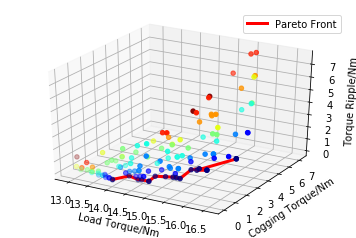

In [14]:
import matplotlib.pyplot as pl
import matplotlib.colors
import matplotlib.cm
import mpl_toolkits.mplot3d as mpl

cm = pl.get_cmap('jet')
cNorm = matplotlib.colors.Normalize(vmin=0, vmax=max(fp.keys()))
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap=cm)

fig = pl.figure()
ax = fig.add_subplot(111, projection='3d')
for k in fp:
    ax.scatter(fp[k][0], fp[k][1], fp[k][2], color=scalarMap.to_rgba(k))
ax.plot(fp[0][0], fp[0][1], fp[0][2],
        color='red', linewidth=3, label='Pareto Front')
ax.set_xlabel(parvardef['objective_vars'][0]['label'])
ax.set_ylabel(parvardef['objective_vars'][1]['label'])
ax.set_zlabel(parvardef['objective_vars'][2]['label'])

pl.legend()
pl.show()

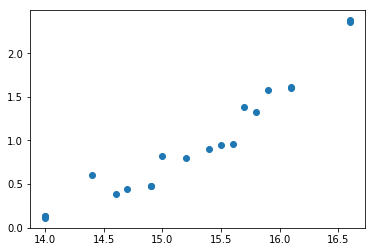

In [15]:
pl.plot(fp[0][0], fp[0][2], 'o')
pl.show()

With multi objective optimization

In [16]:
import femagtools.opt
import femagtools.condor

workdir = os.path.join(userdir, 'opti')
try:
    os.makedirs(workdir)
except OSError:
    pass

parvardef['population_size'] = 32

parvardef['decision_vars'][0]['desc'] = 'Slot width/mm' 
parvardef['decision_vars'][1]['desc'] = 'rel. Magn. width' 
parvardef['decision_vars'][2]['desc'] = 'Magn. Shape/mm' 
parvardef['objective_vars'][0]['desc'] = 'Load Torque/Nm' 
parvardef['objective_vars'][1]['desc'] = 'Cogging Torque/Nm' 
parvardef['objective_vars'][2]['desc'] = 'Torque Ripple/Nm' 

engine = femagtools.condor.Engine()
opt = femagtools.opt.Optimizer(workdir, magnetizingCurves=dict(), magnetMat=dict())
num_generations = 3
results = opt.optimize(num_generations, parvardef, machine, operatingConditions, engine)

2017-10-30 15:50:42,644 Decision Vars: ['stator.statorRotor3.slot_width', 'magnet.magnetSector.magn_width_pct', 'magnet.magnetSector.magn_shape']
2017-10-30 15:50:42,646 bounds lower: (0.003, 0.72, 0.024)  upper: (0.008, 0.85, 0.0335)
2017-10-30 15:50:42,654 Optimize x:3 f:3 generations:3 population size:32
2017-10-30 15:50:42,657 Generation 0
2017-10-30 15:50:42,729 Prepare: stator.statorRotor3.slot_width = 0.006901227065961834
2017-10-30 15:50:42,731 Prepare: magnet.magnetSector.magn_width_pct = 0.8392199204543361
2017-10-30 15:50:42,734 Prepare: magnet.magnetSector.magn_shape = 0.03281609356411196
2017-10-30 15:50:42,859 Prepare: stator.statorRotor3.slot_width = 0.007158868415395981
2017-10-30 15:50:42,861 Prepare: magnet.magnetSector.magn_width_pct = 0.7667729810900695
2017-10-30 15:50:42,863 Prepare: magnet.magnetSector.magn_shape = 0.025539425300242044
2017-10-30 15:50:42,872 Prepare: stator.statorRotor3.slot_width = 0.004655262118164552
2017-10-30 15:50:42,875 Prepare: magnet.ma

2017-10-30 15:50:43,365 Prepare: stator.statorRotor3.slot_width = 0.0067590344526303366
2017-10-30 15:50:43,367 Prepare: magnet.magnetSector.magn_width_pct = 0.8272621132696466
2017-10-30 15:50:43,370 Prepare: magnet.magnetSector.magn_shape = 0.0243095546028629
2017-10-30 15:50:43,381 Prepare: stator.statorRotor3.slot_width = 0.006532988286281937
2017-10-30 15:50:43,383 Prepare: magnet.magnetSector.magn_width_pct = 0.7713249829301912
2017-10-30 15:50:43,387 Prepare: magnet.magnetSector.magn_shape = 0.029098910356390326
2017-10-30 15:50:43,725 submit cluster 193
2017-10-30 15:53:16,677 status 22: C
2017-10-30 15:53:16,680 status 20: C
2017-10-30 15:53:16,682 status 29: C
2017-10-30 15:53:16,683 status 23: C
2017-10-30 15:53:16,685 status 30: C
2017-10-30 15:53:16,687 status 28: C
2017-10-30 15:53:16,688 status 27: C
2017-10-30 15:53:16,690 status 31: C
2017-10-30 15:53:16,692 status 16: C
2017-10-30 15:53:16,694 status 19: C
2017-10-30 15:53:16,696 status 18: C
2017-10-30 15:53:16,698 s

2017-10-30 15:53:17,789 Prepare: magnet.magnetSector.magn_width_pct = 0.7654148930358687
2017-10-30 15:53:17,791 Prepare: magnet.magnetSector.magn_shape = 0.025487775616176874
2017-10-30 15:53:17,803 Prepare: stator.statorRotor3.slot_width = 0.003470970189557722
2017-10-30 15:53:17,806 Prepare: magnet.magnetSector.magn_width_pct = 0.7905487981958157
2017-10-30 15:53:17,811 Prepare: magnet.magnetSector.magn_shape = 0.0299557483366556
2017-10-30 15:53:17,822 Prepare: stator.statorRotor3.slot_width = 0.0038425928918056624
2017-10-30 15:53:17,825 Prepare: magnet.magnetSector.magn_width_pct = 0.7786989996191734
2017-10-30 15:53:17,827 Prepare: magnet.magnetSector.magn_shape = 0.028620990668774104
2017-10-30 15:53:17,841 Prepare: stator.statorRotor3.slot_width = 0.007056756806605674
2017-10-30 15:53:17,843 Prepare: magnet.magnetSector.magn_width_pct = 0.7678836518588832
2017-10-30 15:53:17,846 Prepare: magnet.magnetSector.magn_shape = 0.02597671313731732
2017-10-30 15:53:17,859 Prepare: stat

2017-10-30 15:55:36,115 Reading /home/tar/opti/4/PM-4-130_001.BATCH
2017-10-30 15:55:36,146 Reading /home/tar/opti/5/PM-4-130_001.BATCH
2017-10-30 15:55:36,170 Reading /home/tar/opti/6/PM-4-130_001.BATCH
2017-10-30 15:55:36,195 Reading /home/tar/opti/7/PM-4-130_001.BATCH
2017-10-30 15:55:36,220 Reading /home/tar/opti/8/PM-4-130_001.BATCH
2017-10-30 15:55:36,240 Reading /home/tar/opti/9/PM-4-130_001.BATCH
2017-10-30 15:55:36,259 Reading /home/tar/opti/10/PM-4-130_001.BATCH
2017-10-30 15:55:36,281 Reading /home/tar/opti/11/PM-4-130_001.BATCH
2017-10-30 15:55:36,297 Reading /home/tar/opti/12/PM-4-130_001.BATCH
2017-10-30 15:55:36,322 Reading /home/tar/opti/13/PM-4-130_001.BATCH
2017-10-30 15:55:36,343 Reading /home/tar/opti/14/PM-4-130_001.BATCH
2017-10-30 15:55:36,362 Reading /home/tar/opti/15/PM-4-130_001.BATCH
2017-10-30 15:55:36,378 Reading /home/tar/opti/16/PM-4-130_001.BATCH
2017-10-30 15:55:36,397 Reading /home/tar/opti/17/PM-4-130_001.BATCH
2017-10-30 15:55:36,419 Reading /home/ta

2017-10-30 15:55:37,203 Prepare: stator.statorRotor3.slot_width = 0.0040466850076293
2017-10-30 15:55:37,206 Prepare: magnet.magnetSector.magn_width_pct = 0.7829958253606173
2017-10-30 15:55:37,212 Prepare: magnet.magnetSector.magn_shape = 0.025278669910865473
2017-10-30 15:55:37,224 Prepare: stator.statorRotor3.slot_width = 0.0041671052495465995
2017-10-30 15:55:37,227 Prepare: magnet.magnetSector.magn_width_pct = 0.8323932700779197
2017-10-30 15:55:37,230 Prepare: magnet.magnetSector.magn_shape = 0.026189201993944915
2017-10-30 15:55:37,241 Prepare: stator.statorRotor3.slot_width = 0.004456682315605788
2017-10-30 15:55:37,244 Prepare: magnet.magnetSector.magn_width_pct = 0.7744513963329571
2017-10-30 15:55:37,247 Prepare: magnet.magnetSector.magn_shape = 0.02515018496897878
2017-10-30 15:55:37,263 Prepare: stator.statorRotor3.slot_width = 0.004119941681930533
2017-10-30 15:55:37,268 Prepare: magnet.magnetSector.magn_width_pct = 0.8322299273439336
2017-10-30 15:55:37,271 Prepare: magn

2017-10-30 15:58:38,251 finished


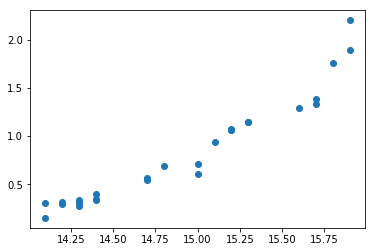

In [17]:
pl.plot([t for t in results['f'][0] if t>0], [p for p in results['f'][2] if p>0], 'o')
pl.show()